In [1]:
import os
os.makedirs("figs", exist_ok=True)
import matplotlib.pyplot as plt
from typing import List, Dict, Any
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from config import cfg
from utils import *
from metrics import *

from pyannote.metrics.diarization import DiarizationErrorRate, JaccardErrorRate

[NbConvertApp] WARNING | pattern 'config.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Exec

In [2]:
dev_names  = read_list(cfg.dev_list)
test_names = read_list(cfg.test_list)

In [3]:
# PYANNOTE
print("\n=== pyannote metrics ===")
py_dev  = compute_metrics_for_split("dev",  dev_names,  cfg.pyannote_rttm_dev)
py_test = compute_metrics_for_split("test", test_names, cfg.pyannote_rttm_test)


=== pyannote metrics ===
[dev] abjxc  DER=0.0060,  JER=0.0060
[dev] afjiv  DER=0.0972,  JER=0.0869
[dev] akthc  DER=0.0507,  JER=0.0495
[dev] ampme  DER=0.0521,  JER=0.0427
[dev] atgpi  DER=0.0499,  JER=0.0498
[dev] aufkn  DER=0.0476,  JER=0.0346
[dev] bkwns  DER=0.0067,  JER=0.0067
[dev] blwmj  DER=0.0159,  JER=0.0076
[dev] bwzyf  DER=0.0176,  JER=0.0173
[dev] ccokr  DER=0.0822,  JER=0.0211
[dev] cobal  DER=0.0042,  JER=0.0042
[dev] cqaec  DER=0.1134,  JER=0.0694
[dev] cwryz  DER=0.0868,  JER=0.0136
[dev] djngn  DER=0.0116,  JER=0.0080
[dev] dscgs  DER=0.0535,  JER=0.0291

[dev summary] DER=0.0464, JER=0.0298
[test] aepyx  DER=0.0841,  JER=0.0496
[test] aiqwk  DER=0.0756,  JER=0.0616
[test] bxcfq  DER=0.0191,  JER=0.0067
[test] cadba  DER=0.0509,  JER=0.0274
[test] crylr  DER=0.0970,  JER=0.0844
[test] dxokr  DER=0.0245,  JER=0.0240
[test] eoyaz  DER=0.0434,  JER=0.0232
[test] fqrnu  DER=0.0712,  JER=0.0462

[test summary] DER=0.0582, JER=0.0404


In [4]:
# ECAPA-TDNN + VBx
print("\n=== ECAPA-TDNN + VBx metrics ===")
vbx_dev  = compute_metrics_for_split("dev",  dev_names,  cfg.ecapa_vbx_rttm_dev)
vbx_test = compute_metrics_for_split("test", test_names, cfg.ecapa_vbx_rttm_test)


=== ECAPA-TDNN + VBx metrics ===
[dev] abjxc  DER=0.0903,  JER=0.0828
[dev] afjiv  DER=0.2193,  JER=0.1798
[dev] akthc  DER=0.0841,  JER=0.0775
[dev] ampme  DER=0.0853,  JER=0.0788
[dev] atgpi  DER=0.0175,  JER=0.0173
[dev] aufkn  DER=0.0811,  JER=0.0230
[dev] bkwns  DER=0.3889,  JER=0.2800
[dev] blwmj  DER=0.0326,  JER=0.0209
[dev] bwzyf  DER=0.1797,  JER=0.1533
[dev] ccokr  DER=0.1693,  JER=0.0624
[dev] cobal  DER=0.0022,  JER=0.0022
[dev] cqaec  DER=0.1616,  JER=0.0908
[dev] cwryz  DER=0.1214,  JER=0.0495
[dev] djngn  DER=0.0481,  JER=0.0442
[dev] dscgs  DER=0.0748,  JER=0.0360

[dev summary] DER=0.1171, JER=0.0799
[test] aepyx  DER=0.1837,  JER=0.1413
[test] aiqwk  DER=0.1444,  JER=0.1179
[test] bxcfq  DER=0.0290,  JER=0.0041
[test] cadba  DER=0.1104,  JER=0.0699
[test] crylr  DER=0.2325,  JER=0.1810
[test] dxokr  DER=0.0539,  JER=0.0512
[test] eoyaz  DER=0.0617,  JER=0.0314
[test] fqrnu  DER=0.1044,  JER=0.0533

[test summary] DER=0.1150, JER=0.0813


In [5]:
print("\n====== FINAL SUMMARY ======")
print("PYANNOTE DEV:", py_dev)
print("PYANNOTE TEST:", py_test)
print("ECAPA+VBx DEV:", vbx_dev)
print("ECAPA+VBx TEST:", vbx_test)


====== FINAL SUMMARY ======
PYANNOTE DEV: {'DER': 0.04636192944970459, 'JER': 0.029763204582303176}
PYANNOTE TEST: {'DER': 0.05822601500706129, 'JER': 0.040373902673181014}
ECAPA+VBx DEV: {'DER': 0.11707481945317112, 'JER': 0.07990201326628929}
ECAPA+VBx TEST: {'DER': 0.11501403530643683, 'JER': 0.08126076983575808}


In [6]:
data = [
    ("pyannote", "dev",  py_dev["DER"],  py_dev["JER"]),
    ("pyannote", "test", py_test["DER"], py_test["JER"]),
    ("ecapa+VBx", "dev",  vbx_dev["DER"],  vbx_dev["JER"]),
    ("ecapa+VBx", "test", vbx_test["DER"], vbx_test["JER"]),
]

df = pd.DataFrame(data, columns=["Model", "Split", "DER", "JER"])
df.to_csv("results_summary.csv", index=False)
df

,Model,Split,DER,JER
0,pyannote,dev,0.046362,0.029763
1,pyannote,test,0.058226,0.040374
2,ecapa+VBx,dev,0.117075,0.079902
3,ecapa+VBx,test,0.115014,0.081261


In [7]:
metrics = ["DER", "JER"]
splits  = ["dev", "test"]

values = {
    "DER": {
        "pyannote":  [py_dev["DER"],  py_test["DER"]],
        "ecapa+VBx": [vbx_dev["DER"], vbx_test["DER"]],
    },
    "JER": {
        "pyannote":  [py_dev["JER"],  py_test["JER"]],
        "ecapa+VBx": [vbx_dev["JER"], vbx_test["JER"]],
    },
}

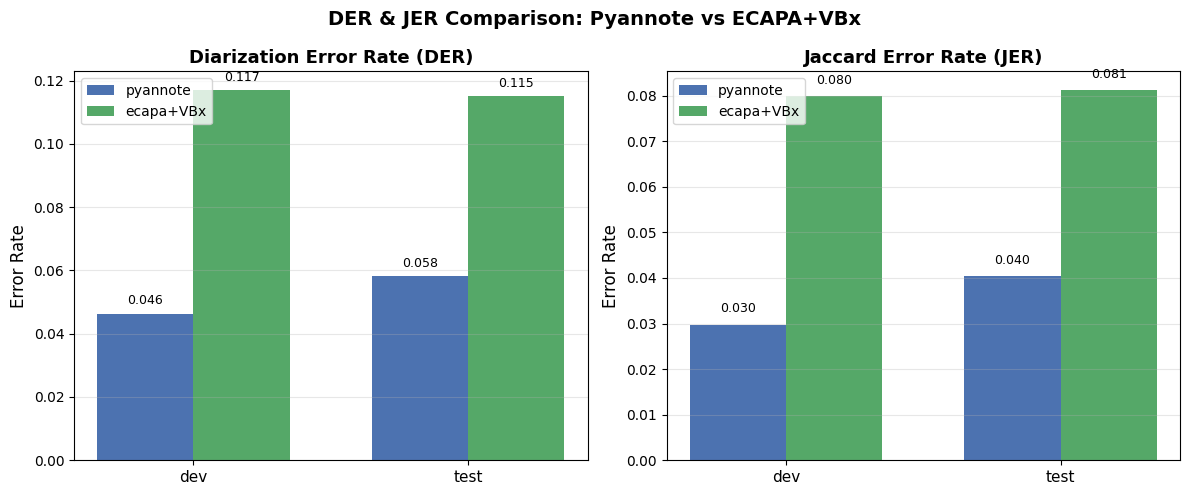

In [8]:
model_1 = "pyannote"
model_2 = "ecapa+VBx"

colors = {
    model_1: "#4C72B0",
    model_2: "#55A868",
}

x = np.arange(len(splits))
width = 0.35

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=False)

pretty_names = {
    "DER": "Diarization Error Rate (DER)",
    "JER": "Jaccard Error Rate (JER)",
}

for ax, metric in zip(axes, metrics):
    py_vals = values[metric][model_1]
    ec_vals = values[metric][model_2]

    # bars
    ax.bar(x - width/2, py_vals, width,
           label=model_1, color=colors[model_1])
    ax.bar(x + width/2, ec_vals, width,
           label=model_2, color=colors[model_2])

    ax.set_xticks(x)
    ax.set_xticklabels(splits, fontsize=11)
    ax.set_title(pretty_names[metric], fontsize=13, fontweight="bold")
    ax.set_ylabel("Error Rate", fontsize=12)

    for xi, v in zip(x - width/2, py_vals):
        ax.text(xi, v + 0.002, f"{v:.3f}", ha="center", va="bottom", fontsize=9)
    for xi, v in zip(x + width/2, ec_vals):
        ax.text(xi, v + 0.002, f"{v:.3f}", ha="center", va="bottom", fontsize=9)

    ax.legend()
    ax.grid(axis="y", alpha=0.3)

plt.suptitle("DER & JER Comparison: Pyannote vs ECAPA+VBx",
             fontsize=14, fontweight="bold")
plt.tight_layout()
plt.savefig("figs/der_jer_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

In [9]:
py_dev_res  = compute_metrics_for_split_with_files("dev",  dev_names,  cfg.pyannote_rttm_dev)
py_test_res = compute_metrics_for_split_with_files("test", test_names, cfg.pyannote_rttm_test)

vbx_dev_res  = compute_metrics_for_split_with_files("dev",  dev_names,  cfg.ecapa_vbx_rttm_dev)
vbx_test_res = compute_metrics_for_split_with_files("test", test_names, cfg.ecapa_vbx_rttm_test)

py_dev,  py_test  = py_dev_res["summary"],  py_test_res["summary"]
vbx_dev, vbx_test = vbx_dev_res["summary"], vbx_test_res["summary"]

df_files = pd.DataFrame(
    py_dev_res["records"]  +
    py_test_res["records"] +
    vbx_dev_res["records"] +
    vbx_test_res["records"]
)

n_files = len(dev_names) + len(test_names)
df_files.loc[:n_files-1,        "model"] = "pyannote"
df_files.loc[n_files:,          "model"] = "ecapa+VBx"

df_files.head(10)

,file,split,DER,JER,model
0,abjxc,dev,0.006038,0.006002,pyannote
1,afjiv,dev,0.097177,0.086950,pyannote
2,akthc,dev,0.050732,0.049453,pyannote
3,ampme,dev,0.052078,0.042663,pyannote
4,atgpi,dev,0.049933,0.049751,pyannote
5,aufkn,dev,0.047645,0.034614,pyannote
6,bkwns,dev,0.006749,0.006715,pyannote
7,blwmj,dev,0.015935,0.007584,pyannote
8,bwzyf,dev,0.017570,0.017269,pyannote
9,ccokr,dev,0.082180,0.021085,pyannote


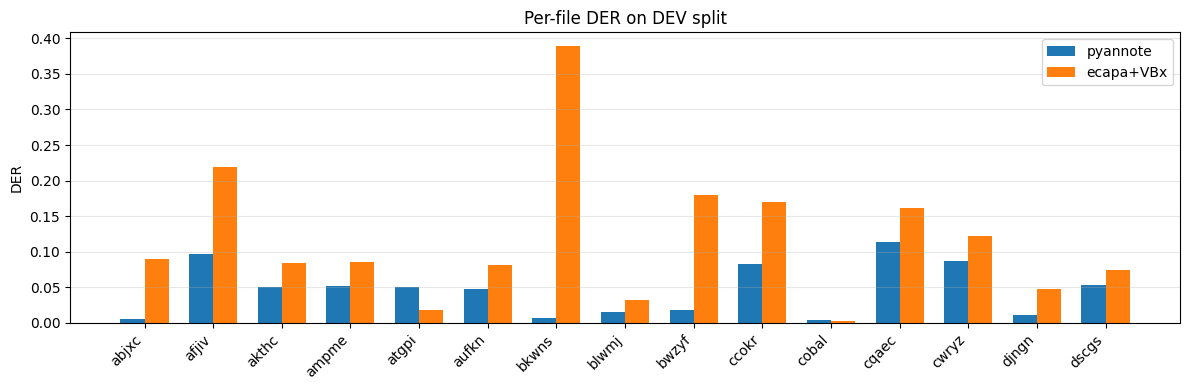

In [10]:
dev_df = df_files[df_files["split"] == "dev"].copy()
dev_df = dev_df.sort_values(["file", "model"])

plt.figure(figsize=(12, 4))

files = sorted(dev_df["file"].unique())
x = np.arange(len(files))
width = 0.35

models_to_plot = ["pyannote", "ecapa+VBx"]

for i, model in enumerate(models_to_plot):
    sub = dev_df[dev_df["model"] == model]

    der_vals = sub.set_index("file").loc[files, "DER"].values

    plt.bar(x + (i-0.5)*width, der_vals, width, label=model)

plt.xticks(x, files, rotation=45, ha="right")
plt.ylabel("DER")
plt.title("Per-file DER on DEV split")
plt.grid(axis="y", alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("figs/per_file_DER_dev.png", dpi=300, bbox_inches="tight")
plt.show()

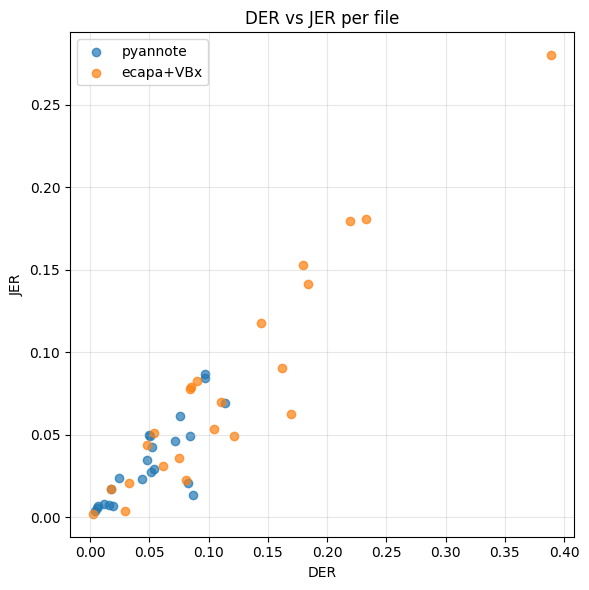

In [11]:
plt.figure(figsize=(6,6))

for model in ["pyannote", "ecapa+VBx"]:
    sub = df_files[df_files["model"] == model]
    plt.scatter(sub["DER"], sub["JER"], label=model, alpha=0.7)

plt.xlabel("DER")
plt.ylabel("JER")
plt.title("DER vs JER per file")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("figs/der_vs_jer_per_file.png", dpi=300, bbox_inches="tight")
plt.show()

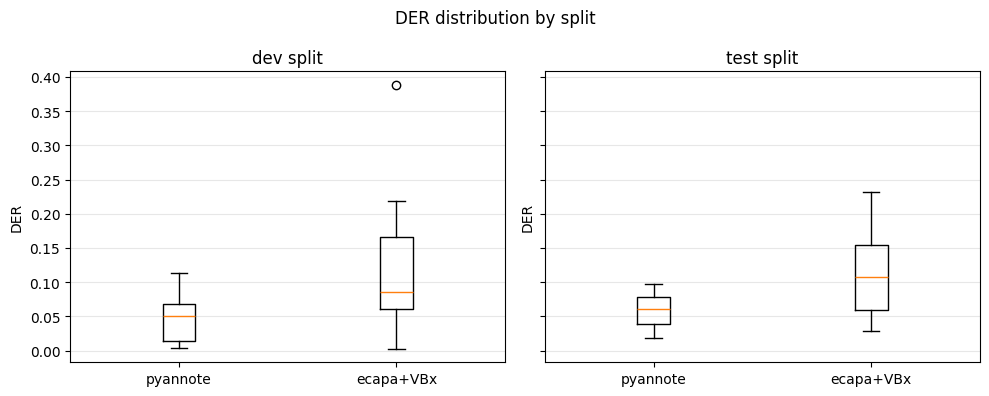

In [12]:
def boxplot_metric_split(metric="DER"):
    fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)

    for ax, split in zip(axes, ["dev", "test"]):
        sub = df_files[df_files["split"] == split]

        data = [
            sub[sub["model"] == "pyannote"][metric],
            sub[sub["model"] == "ecapa+VBx"][metric],
        ]

        ax.boxplot(data, labels=["pyannote", "ecapa+VBx"])
        ax.set_title(f"{split} split")
        ax.set_ylabel(metric)
        ax.grid(axis="y", alpha=0.3)

    plt.suptitle(f"{metric} distribution by split")
    plt.tight_layout()
    plt.savefig(f"figs/{metric.lower()}_distribution_by_split.png",
                dpi=300, bbox_inches="tight")
    plt.show()

boxplot_metric_split("DER")